# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']].isna().sum()

munResNome        0
IDADEMAE          0
IDADEPAI      19421
dtype: int64

In [5]:
df_med_mae = sinasc_raw[['munResNome', 'IDADEMAE']].pivot_table(values = 'IDADEMAE', index = 'munResNome',
            aggfunc = 'mean')
df_med_pai = sinasc_raw[['munResNome', 'IDADEPAI']].pivot_table(values = 'IDADEPAI', index = 'munResNome',
            aggfunc = 'mean')
df_med_idademaepai = df_med_mae.merge(df_med_pai, on='munResNome', how='left')

print(df_med_mae.shape)
print(df_med_pai.shape)
print(df_med_idademaepai.shape)

df_med_idademaepai


(53, 1)
(53, 1)
(53, 2)


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


<AxesSubplot:xlabel='munResNome'>

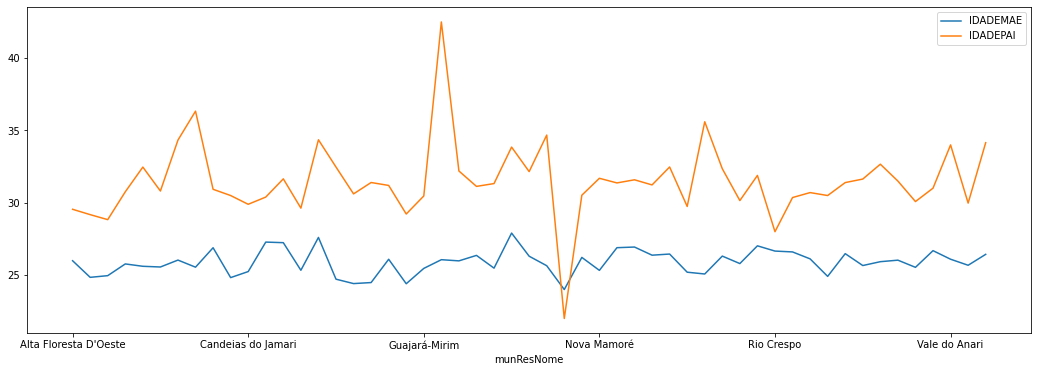

In [6]:
df_med_idademaepai.plot(figsize = [18,6])


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
df1 = sinasc_raw[['DTNASC', 'ESCMAE', 'SEXO', 'PESO']]
df2 = df1[df1['DTNASC'] == '2019-01-11'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()
df2.fillna(0)

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,0.000000,3477.5
12 anos ou mais,3085.714286,3160.0
4 a 7 anos,3188.000000,3639.0
8 a 11 anos,3233.150000,3480.0


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [31]:
df3 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE','IDADEPAI']]
df3

,munResNome,DTNASC,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,2019-02-19,19,26.0
1,Alta Floresta D'Oeste,2019-02-21,29,24.0
2,Alta Floresta D'Oeste,2019-02-25,37,32.0
3,Alto Alegre dos Parecis,2019-03-20,30,24.0
4,Alta Floresta D'Oeste,2019-03-23,30,27.0
...,...,...,...,...
27023,Vilhena,2019-12-13,32,35.0
27024,Chupinguaia,2019-10-04,19,NaN
27025,Vilhena,2019-08-02,24,30.0
27026,Vilhena,2019-12-23,21,24.0


In [32]:
df3[['munResNome']].value_counts()

munResNome               
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras          

O município que nasceu menos bebê em 2019 foi o município de Castanheiras.


In [33]:
agrupamento = df3[df3['munResNome']=='Castanheiras'].groupby(['munResNome'])
agrupamento.aggregate(['mean', max, min])

IDADEMAE           IDADEPAI            
                  mean max min       mean   max   min
munResNome                                           
Castanheiras  27.28125  39  17  30.392857  43.0  17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [16]:
df4 = sinasc_raw[['DTNASC','munResNome','QTDFILVIVO', 'IDADEPAI']]

In [19]:
df4[['ano', 'mes', 'dia']] = df4['DTNASC'].str.split('-', expand=True)
df4

,DTNASC,munResNome,QTDFILVIVO,IDADEPAI,ano,mes,dia
0,2019-02-19,Alta Floresta D'Oeste,0.0,26.0,2019,02,19
1,2019-02-21,Alta Floresta D'Oeste,1.0,24.0,2019,02,21
2,2019-02-25,Alta Floresta D'Oeste,2.0,32.0,2019,02,25
3,2019-03-20,Alto Alegre dos Parecis,0.0,24.0,2019,03,20
4,2019-03-23,Alta Floresta D'Oeste,1.0,27.0,2019,03,23
...,...,...,...,...,...,...,...
27023,2019-12-13,Vilhena,1.0,35.0,2019,12,13
27024,2019-10-04,Chupinguaia,0.0,NaN,2019,10,04
27025,2019-08-02,Vilhena,0.0,30.0,2019,08,02
27026,2019-12-23,Vilhena,1.0,24.0,2019,12,23


In [9]:
df5 = df4[df4['mes']=='03']
df5

,DTNASC,munResNome,QTDFILVIVO,IDADEPAI,IDADEMAE,ano,mes,dia
3,2019-03-20,Alto Alegre dos Parecis,0.0,24.0,30,2019,03,20
4,2019-03-23,Alta Floresta D'Oeste,1.0,27.0,30,2019,03,23
5,2019-03-27,Alta Floresta D'Oeste,2.0,40.0,33,2019,03,27
9,2019-03-11,Alta Floresta D'Oeste,1.0,41.0,30,2019,03,11
10,2019-03-11,Alta Floresta D'Oeste,1.0,28.0,31,2019,03,11
...,...,...,...,...,...,...,...,...
13670,2019-03-21,Porto Velho,0.0,NaN,24,2019,03,21
13671,2019-03-22,Porto Velho,2.0,NaN,24,2019,03,22
13736,2019-03-07,Porto Velho,1.0,42.0,35,2019,03,07
13748,2019-03-30,Vilhena,2.0,NaN,36,2019,03,30


In [10]:
df5['mes'].value_counts()

03    2456
Name: mes, dtype: int64

In [11]:
df5['munResNome'].value_counts()

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [12]:
df5.groupby('munResNome')['mes'].count().sort_values(ascending = False)

munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

O município que mais nasceram bebês no mês de Março foi o Município de Porto Velho (Capital do Estado de RO).

In [13]:
agrupamento1 = df5[df5['munResNome']== 'Porto Velho'].groupby(['munResNome'])['QTDFILVIVO']
agrupamento1.aggregate(['mean', max, min])

,mean,max,min
munResNome,,,
Porto Velho,1.295056,9.0,0.0


In [15]:
agrupamento2 = df5[df5['munResNome']== 'Porto Velho'].groupby(['munResNome'])['IDADEPAI']
agrupamento2.aggregate(['mean', max, min])

,mean,max,min
munResNome,,,
Porto Velho,34.629032,62.0,19.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

**Insights: Denota-se que a faixa etária dos homens que tiveram filhos em 2019 no Estado de Rondônia ficou em torno de 30 a 35 anos, enquanto que as mulheres que tiveram filhos neste mesmo ano ficou em torno dos 25 anos. Ou seja, os pais em sua grande maioria eram mais velhos que as mães. O município com menos nascimento foi o Município de Castanheira, local onde a variação da idade entre o pai e a mãe foi menor, ou seja, as idades dos pais e das mães eram mais próximo. Já o Município de Porto Velho (capital de Rondônia) teve a maior taxa de natalidade do Estado no mês de março de 2019, sendo que a variação da idade do pai foi alta, a idade máxima foi de 62 anos e a mínima de 19 anos, sendo a média de aproximadamente 35 anos. Com relação ao peso médio dos bebês, não se verificou qualquer correlação entre o peso dos bebês e a escolaridade da mãe. Somente, o que se verificou foi que os bebês masculinos constumam nascer com um peso maior.**

In [ ]:
#OBS: estes códigos abaixo já se encontram no arquivo baixado para a realização da tarefa. 
#Contudo não foi utilizado para a realização desta tarefa. 

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')